<a href="https://colab.research.google.com/github/arun8nov/SQL_Practice/blob/main/SQL_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Summary of All SQL Commands

##sql commands
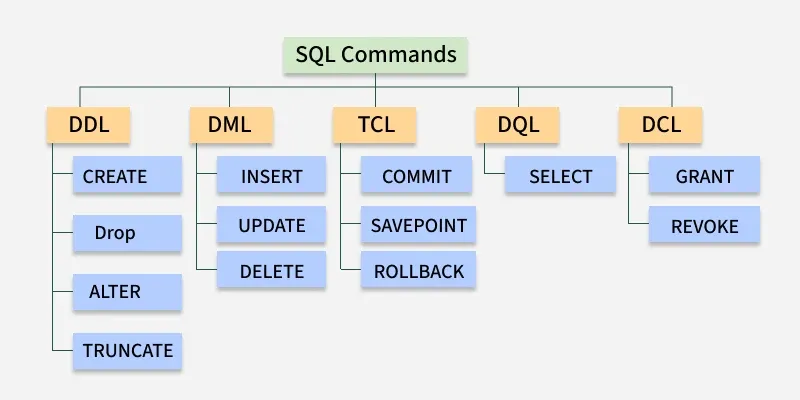

SQL is the language that powers data management, and mastering its core commands is essential for anyone working with databases. Let’s break them down into five main categories:

## **✅ DQL (Data Query Language):**

Retrieve data from databases using commands like:

SELECT — Extract specific data from tables.

WHERE — Filter records based on conditions.

JOIN — Combine rows from multiple tables.

## **✅ DML (Data Manipulation Language):**

Modify data with commands such as:

INSERT — Add new records.

UPDATE — Modify existing records.

DELETE — Remove records.

## **✅ DDL (Data Definition Language):**

Define and manage database structures:

CREATE — Add new tables or databases.

ALTER — Modify table structures.

DROP — Remove tables or databases.

## **✅ DCL (Data Control Language):**

Control access to the database with:

GRANT — Provide specific privileges to users.

REVOKE — Remove previously granted privileges.

## **✅ TCL (Transaction Control Language):**

Manage transactions to maintain data integrity:

COMMIT — Save changes permanently.

ROLLBACK — Undo changes if an error occurs.


# SQL Practice Note book

In [ ]:
# Import libraries
import kagglehub
import os
import pandas as pd
pd.set_option('display.max_columns', None)
import sqlite3
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import text

In [ ]:
# Download Data base from kaggle, Do double time run for path exist in the
path = kagglehub.dataset_download("terencicp/e-commerce-dataset-by-olist-as-an-sqlite-database")

print("Path to dataset files:", path)

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/terencicp/e-commerce-dataset-by-olist-as-an-sqlite-database/versions/1


# E-commerce dataset by Olist
---


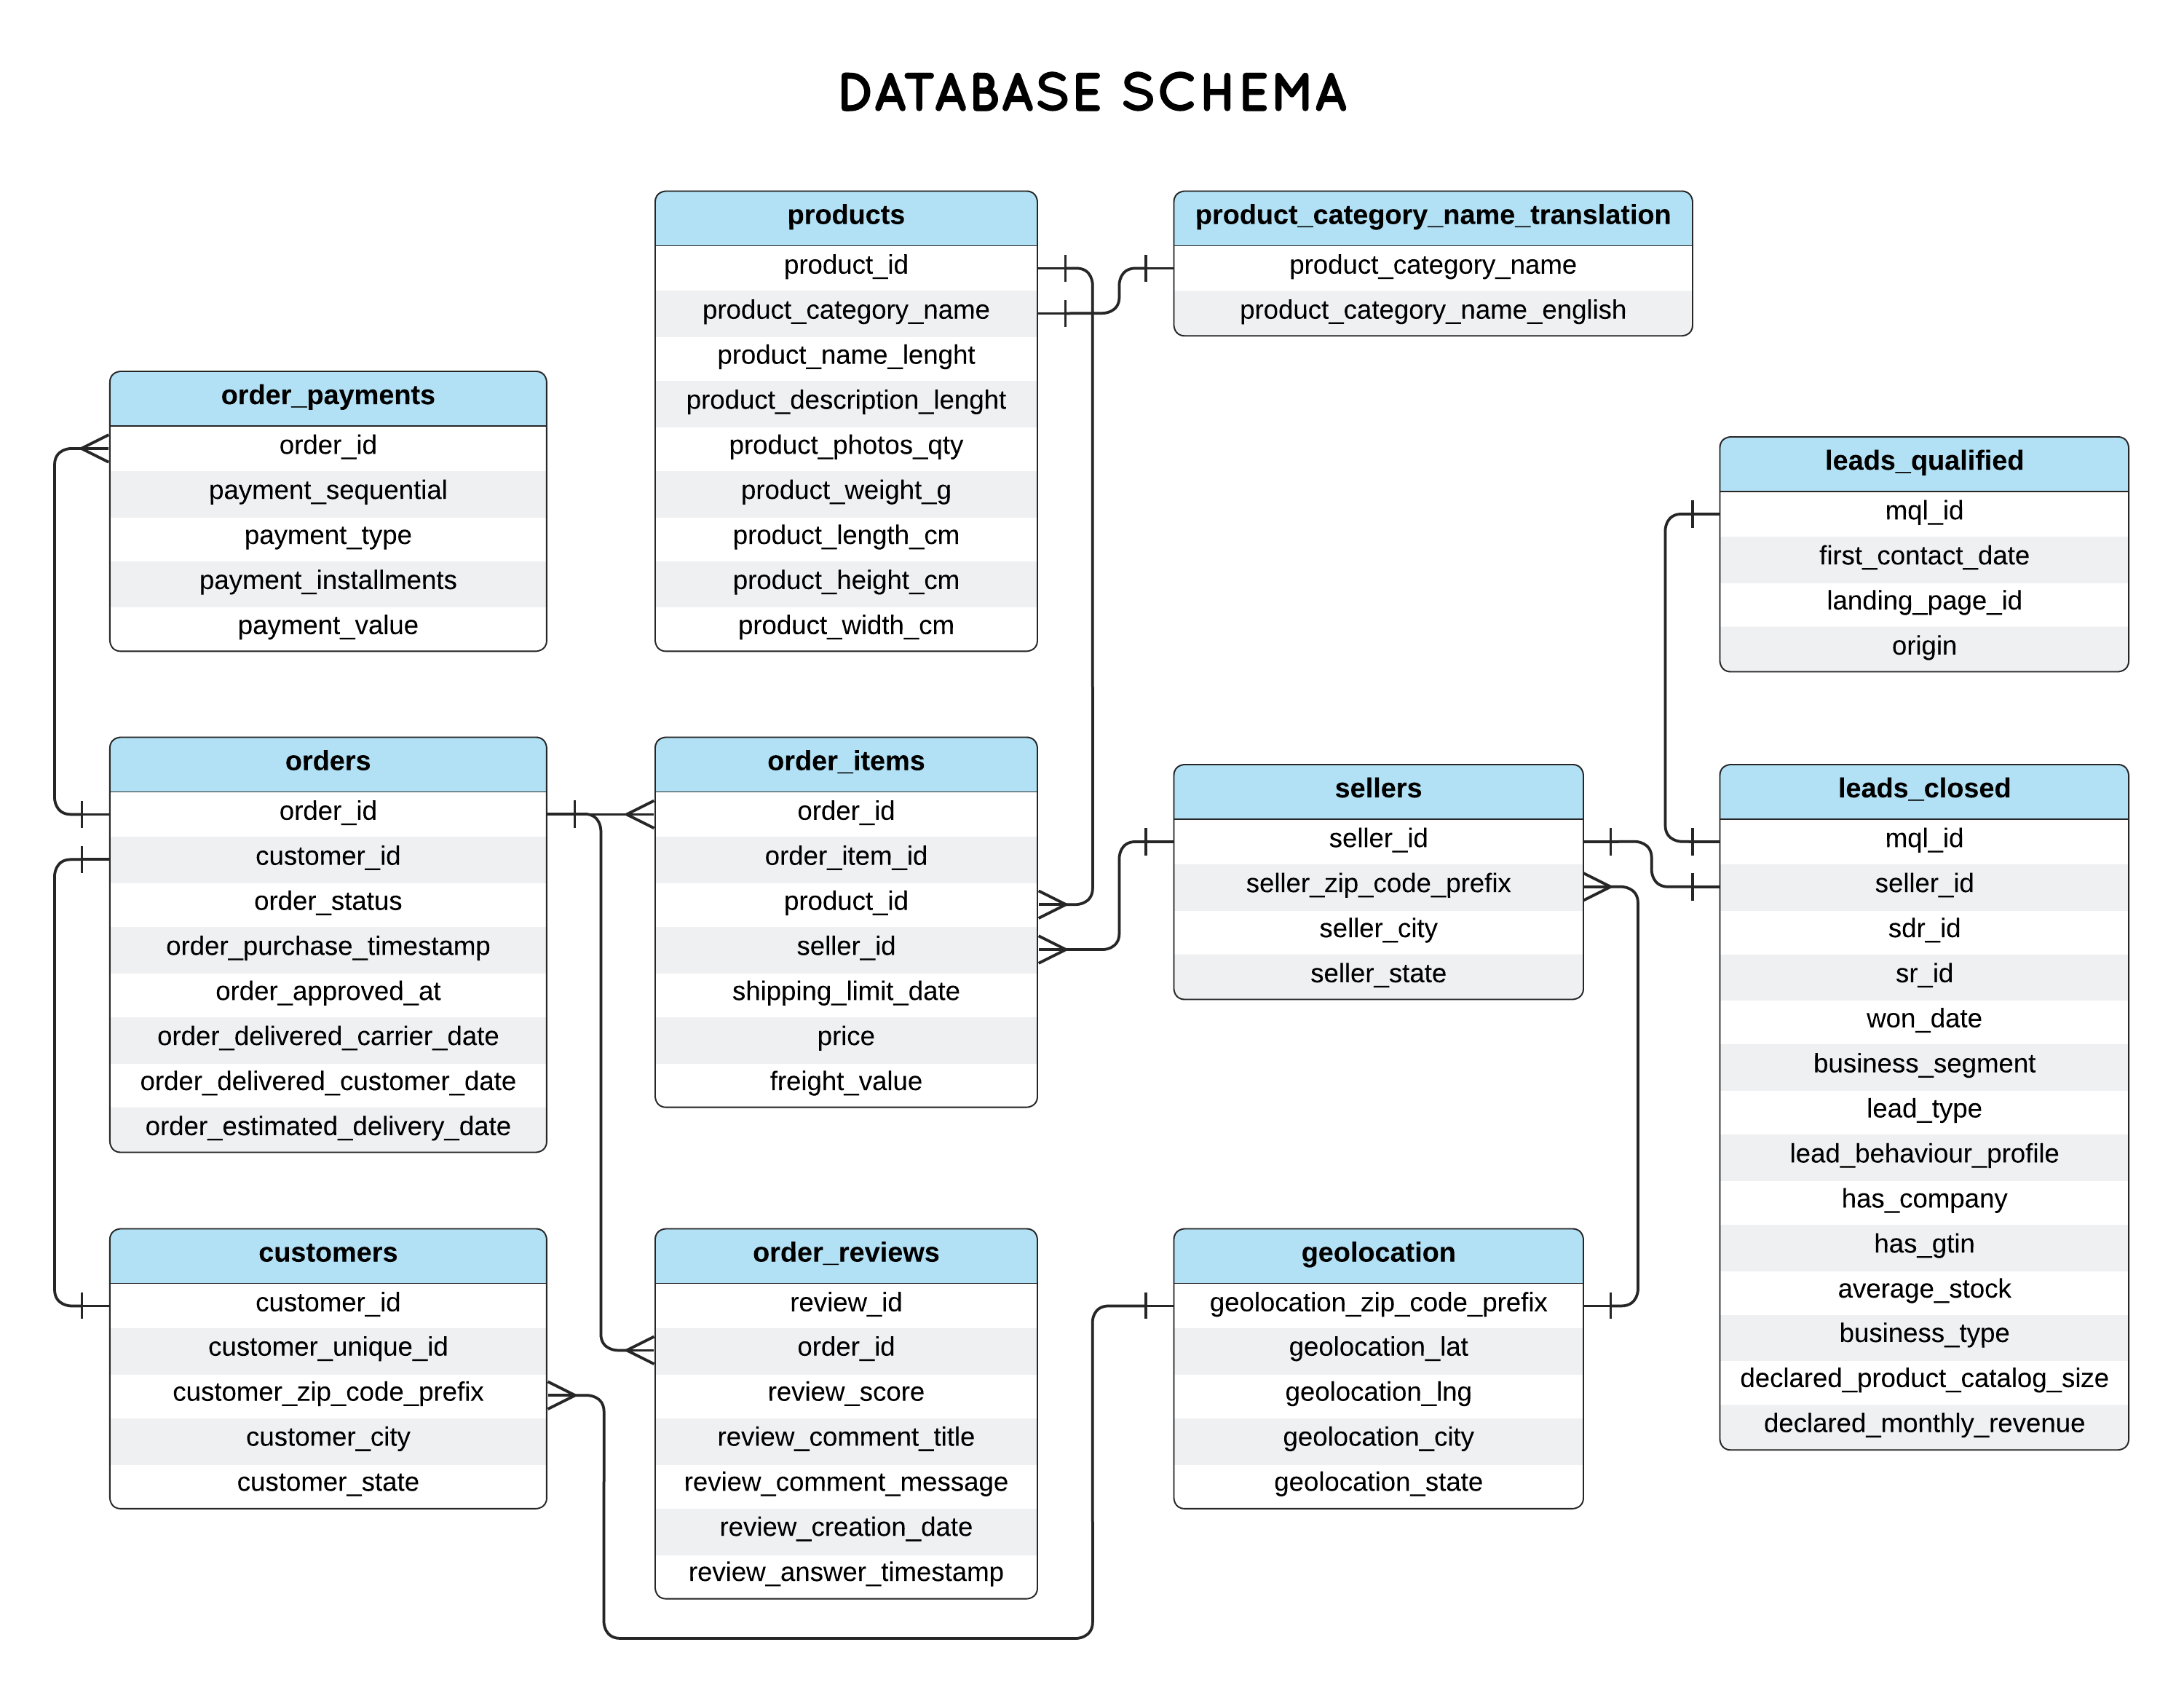

# Functions and definition for sql querying

In [ ]:
os.listdir(path)[0]

'olist.sqlite'

In [ ]:
# Get Database name from the path
db_name = os.listdir(path)[0]
print(f"The Database name is : {db_name}")

The Database name is : olist.sqlite


In [ ]:
# Create sql Database
engine = create_engine(f'sqlite:///{path}/{db_name}')

In [ ]:
# Cursor connection implementation
conn = sqlite3.connect(f'{path}/{db_name}')
cursor = conn.cursor()

In [ ]:
# Function to execute cursor connection for DDL, DCL
def execute_query(query):
    try:
        cursor.execute(query)
        try:
          row = cursor.fetchall()
          for r in row:
            print(r)
        except:
          pass

        conn.commit()

        print("Query executed successfully")
    except Exception as e:
        print(f"Error executing query: {e}")

In [ ]:
# Function to retrive data from database in pandas format using DML Comments only
def query_db(query):
    return pd.read_sql_query(query, engine)

In [ ]:
query_db('''
SELECT * FROM sqlite_master;
''')

,type,name,tbl_name,rootpage,sql
0,table,product_category_name_translation,product_category_name_translation,2,"CREATE TABLE ""product_category_name_translatio..."
1,table,sellers,sellers,3,"CREATE TABLE ""sellers"" (\n""seller_id"" TEXT,\n ..."
2,table,customers,customers,48,"CREATE TABLE ""customers"" (\n""customer_id"" TEXT..."
3,table,geolocation,geolocation,2282,"CREATE TABLE ""geolocation"" (\n""geolocation_zip..."
4,table,order_items,order_items,12881,"CREATE TABLE ""order_items"" (\n""order_id"" TEXT,..."
5,table,order_payments,order_payments,16916,"CREATE TABLE ""order_payments"" (\n""order_id"" TE..."
6,table,order_reviews,order_reviews,18508,"CREATE TABLE ""order_reviews"" (\n""review_id"" TE..."
7,table,orders,orders,22174,"CREATE TABLE ""orders"" (\n""order_id"" TEXT,\n ""..."
8,table,products,products,26706,"CREATE TABLE ""products"" (\n""product_id"" TEXT,\..."
9,table,leads_qualified,leads_qualified,27283,"CREATE TABLE ""leads_qualified"" (\n""mql_id"" TEX..."


In [ ]:
execute_query('''
SELECT name FROM sqlite_master WHERE type='table';
''')

('product_category_name_translation',)
('sellers',)
('customers',)
('geolocation',)
('order_items',)
('order_payments',)
('order_reviews',)
('orders',)
('products',)
('leads_qualified',)
('leads_closed',)
Query executed successfully


# 1.KPI Queries


## Q1.1: "How Many Orders Have Been?"

In [ ]:
query_db("""
SELECT COUNT(*) AS Total_Orders_Count
FROM orders
""")

,Total_Orders_Count
0,99441


## Q1.2: "How Much Revenue Has Been?"

In [ ]:
query_db("""
SELECT SUM(payment_value) AS Total_Revenue
FROM order_payments
""")

,Total_Revenue
0,1.600887e+07


## Q1.3: "How many Customers did we have?"

In [ ]:
query_db("""
SELECT COUNT(DISTINCT customer_id) AS Total_Customers
FROM customers
""")

,Total_Customers
0,99441


## Q1.4: "How many Frequent Customers did we have?"

In [ ]:
query_db("""
SELECT
  customer_id,
  COUNT(order_id)
FROM
  orders
GROUP BY
  customer_id
ORDER BY
  COUNT(order_id) DESC
LIMIT 10

""")

,customer_id,COUNT(order_id)
0,ffffe8b65bbe3087b653a978c870db99,1
1,ffffa3172527f765de70084a7e53aae8,1
2,ffff42319e9b2d713724ae527742af25,1
3,fffeda5b6d849fbd39689bb92087f431,1
4,fffecc9f79fd8c764f843e9951b11341,1
5,fffcb937e9dd47a13f05ecb8290f4d3e,1
6,fffc22669ca576ae3f654ea64c8f36be,1
7,fffb97495f78be80e2759335275df2aa,1
8,fffa0238b217e18a8adeeda0669923a3,1
9,fff93c1da78dafaaa304ff032abc6205,1


## Q1.5: "Average amount of orders by customer?"

In [ ]:
query_db("""
SELECT
  AVG(payment_value) AS Aerage_Payment
FROM order_payments
""")

,Aerage_Payment
0,154.10038


In [ ]:
query_db("""
SELECT *
FROM products
""")

In [ ]:
query_db("""
SELECT *
FROM order_payments
""")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


# Analysis data base execuete following  Questions
| SQl Query Questions  | SQl Query Questions |
|---|---|
| **1.KPI Queries**  <br><br> Q1.1: "How Many Orders Have Been?" <br><br> Q1.2: "How Much Revenue Has Been?" <br><br> Q1.3: "How many Customers did we have?" <br><br> Q1.4: "How many Frequent Customers did we have?" <br><br> Q1.5: "Average amount of orders by customer?" | **2. Ranking / Top-N Queries** <br><br> Q2.1: "The 10 Most Demanded Product Categories" <br><br> Q2.2: "The 10th Items That Generated The Most Revenue" <br><br> Q2.3: "Top 10 States where most Customers are?  (by R$) " <br><br> Q2.4: "Top 10 Cities where most Customers are?  (by R\$) " <br><br> Q2.5: "Top 10 States where most Sellers are? by  (by R\$) " <br><br> Q2.6: "Top 10 Cities where most Sellers are? by  (by R\$)"  |
|**3. Mapping with Queries** Q3.1: <br><br> "Where are the Customers and Sellers located? (by City)  | **4. Distribution / Segmentation Queries** <br><br> Q4.1: "Order distribution by status?" <br><br> Q4.2: "What kind of products are sold by State?" <br><br> Q4.3: "Distribution of type of payments? (By Orders)" <br><br> Q4.4: "Distribution of type of payments? (By R\$)" |
| **5. Logistics Queries** <br><br> Q5.1: "Delays in shipping? By State" <br><br>| **6.Trends with Queries** <br><br> Q6.1 "How many Orders have been during this period? (2016-2018) <br><br> Q6.2: "Order distribution by status? (by Year)" <br><br> Q6.3: "How many sales have been during this period? (2016-2018)

# Practice Area

---

# ✅ **Business Questions & Analysis Instructions**

Below are **priority areas** I want explored. Each item includes what to measure and why it matters for the business.

---

## **1. Customer Experience & Delivery Performance**

### **1.1 Delivery Delays**

* Measure actual delivery time vs. estimated delivery time.
* Identify which sellers, product categories, or regions cause most delays.

**Why:** Delivery delays directly reduce customer satisfaction and increase churn.

### **1.2 Review Score Drivers**

* Analyze how delivery time, freight cost, product category, and seller affect review score.
* Identify top negative themes in review messages.

**Why:** Reviews strongly influence repeat purchase and trust.

---

## **2. Sales & Revenue Performance**

### **2.1 Revenue Breakdown**

* Compute revenue by product category, seller, region, and month.
* Identify fast-growing vs. declining categories.

### **2.2 High-Value Customers**

* Segment customers by:

  * total spending
  * number of orders
  * repeat purchase rate

**Why:** Helps design loyalty programs and targeted campaigns.

---

## **3. Seller Performance & Lead Conversion**

### **3.1 Seller Efficiency**

For each seller:

* Average order value
* On-time delivery rate
* Cancellation/return rate
* Review score distribution

**Why:** Poor performing sellers damage the marketplace reputation.

### **3.2 Lead Funnel Conversion**

Using **leads_qualified → leads_closed** tables:

* Calculate conversion rate per business segment, lead type, and SDR.
* Identify bottlenecks (e.g., low-performing SDRs or ineffective landing pages).

**Why:** Improving conversion means more sellers and more GMV.

---

## **4. Operational Costs**

### **4.1 Freight Cost Efficiency**

* Compare freight_value to:

  * product weight/size
  * distance (customer vs seller zip code → geolocation)
* Identify categories or sellers with unusually high freight cost.

**Why:** Freight inefficiency hurts margins.

---

## **5. Product Portfolio Optimization**

### **5.1 Product Category Analysis**

* Identify categories with:

  * high sales but low profit (high freight)
  * low sales but great satisfaction (opportunity for promotion)
  * high return/cancellation rates

**Why:** Helps refine catalog and marketing spend.

---

## **6. Geographic Insights**

Using geolocation:

* Identify best & worst performing regions by:

  * revenue
  * delivery times
  * product availability
  * customer density vs seller density

**Why:** Helps with logistics optimization and regional marketing.

---

# ⭐ **Deliverables**

Provide for each section:

* KPIs
* Insights
* Visualizations (recommendation: cohort charts, funnel charts, heatmaps, category treemaps, geo-plots)
* High-level business recommendations

---
